# Proyecto Final - Grupo #1
## Integrantes
- Darlyn Bravo Peña
- Joel Gabriel Torrejon
- Giovani Vega
- Brandon Jason Valle Tamayo

## Libs to use

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.feature_selection import f_classif
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


## Carga de Dataset

In [91]:
group_1_df = pd.read_csv('files/GRUPO 1_1.csv', delimiter = "|")
working_columns = [f"V{i+1}" for i in range(30)]
df_numeric = group_1_df.select_dtypes(include=['number'])[working_columns]

## Generalidades del Dataset

In [92]:
group_1_df.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,0.000011,279403833,NO,0.00000,0.000000,0.0,11.991000,0.253845,0.000000,0.000000,...,0.000000,0.026359,0.282127,0.000000,0.0,0.0,0.000000,0.507707,0.0,0.000577
1,0.000021,278970977,NO,0.02043,6.621791,0.0,1.545208,116.968217,19.232067,0.000000,...,0.000007,0.201098,0.016155,0.000014,0.0,0.0,0.000000,0.741277,0.0,0.000690
2,0.000034,266714141,NO,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.117024,0.696280,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000036,278047301,NO,0.00000,0.039873,0.0,0.225174,84.001848,0.104324,0.000000,...,0.000028,0.090584,0.042693,0.000000,0.0,0.0,0.000000,0.706128,0.0,0.004855
4,0.000045,334324292,NO,0.00000,5.223464,0.0,131.933357,130.280795,3.020154,0.044157,...,0.000180,0.257948,0.134969,0.000003,0.0,0.0,0.000965,0.397722,0.0,0.017215


In [93]:
print(group_1_df.shape)
group_1_df.dtypes

(10000, 66)


ALEAT      float64
ID           int64
OBJ         object
V1         float64
V2         float64
            ...   
V27_P      float64
V28_P      float64
V29_P      float64
V30_P      float64
V31_P.1    float64
Length: 66, dtype: object

In [94]:
group_1_df.describe()

,ALEAT,ID,V1,V2,V3,V4,V5,V6,V7,V8,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.029344,2.816031e+08,261.039200,124.314067,0.953652,169.008322,281.740473,3.211213,1.618930,0.011950,...,0.001253,0.165443,0.177288,0.001065,0.000078,0.000252,0.000283,0.502947,0.000534,0.011094
std,0.017098,3.414150e+08,1058.929785,786.846001,28.051622,979.155195,1189.587221,8.988382,18.507076,0.183108,...,0.011811,0.381419,0.632094,0.013760,0.001551,0.011827,0.003108,0.938693,0.016646,0.046727
min,0.000011,2.158800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014511,2.659602e+08,0.000000,0.000000,0.000000,0.335424,5.548826,0.046440,0.000000,0.000000,...,0.000000,0.022386,0.043760,0.000000,0.000000,0.000000,0.000000,0.277462,0.000000,0.000797
50%,0.029280,2.735794e+08,0.000000,0.295540,0.000000,6.189753,31.308841,0.480831,0.000000,0.000000,...,0.000047,0.077268,0.101694,0.000001,0.000000,0.000000,0.000000,0.480198,0.000000,0.002263
75%,0.044246,2.788863e+08,15.531321,13.766102,0.000000,51.979846,149.541211,2.512911,0.000000,0.000000,...,0.000361,0.243676,0.216805,0.000023,0.000000,0.000000,0.000000,0.680295,0.000000,0.006374
max,0.058759,5.080900e+09,25628.988899,32962.461093,2228.616420,62724.729745,55157.305829,279.450335,694.292589,9.814952,...,0.936698,23.351654,38.693362,0.792955,0.117207,0.903368,0.147627,68.732336,0.945917,2.672703


## Exploratory Dana Analysis - ANOVA

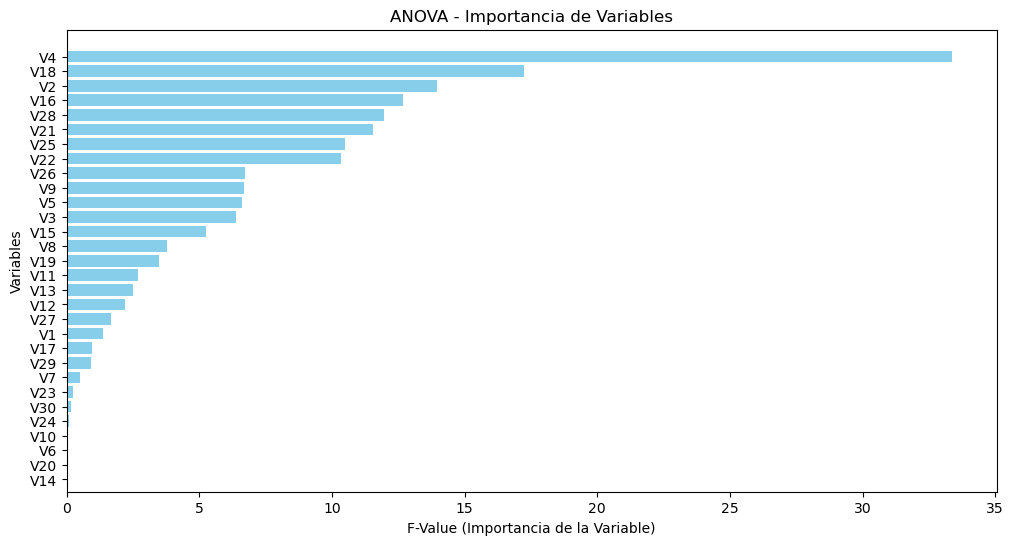

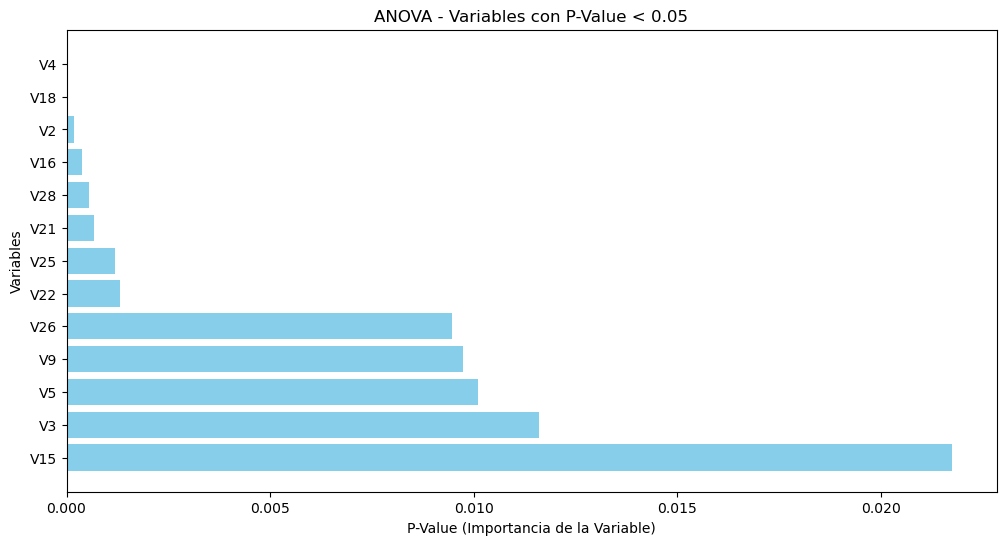

In [95]:
# Aplicar ANOVA F-test
f_values, p_values = f_classif(df_numeric, group_1_df["OBJ"])

anova_results = pd.DataFrame({"Variable": df_numeric.columns.to_list(), "F-Value": f_values, "P-Value": p_values})
anova_results.sort_values(by="P-Value", ascending=True, inplace=True)

# Graficar los valores F en orden descendente
plt.figure(figsize=(12, 6))
plt.barh(anova_results["Variable"], anova_results["F-Value"], color='skyblue')
plt.xlabel("F-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Importancia de Variables")
plt.gca().invert_yaxis()
plt.show()

# Filtrar solo las variables con p-value < 0.05
anova_results_filtered = anova_results[anova_results["P-Value"] < 0.05]

# Graficar solo las variables significativas
plt.figure(figsize=(12, 6))
plt.barh(anova_results_filtered["Variable"], anova_results_filtered["P-Value"], color='skyblue')
plt.xlabel("P-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Variables con P-Value < 0.05")
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()

In [96]:
working_columns = anova_results_filtered["Variable"].to_list()
df_numeric = df_numeric[working_columns]
df_numeric.head()

,V4,V18,V2,V16,V28,V21,V25,V22,V26,V9,V5,V3,V15
0,11.991000,143.987335,0.000000,0.689762,0.000000,7.644041,0.000000,0.000000,0.0,1.343712,0.253845,0.0,0.0
1,1.545208,446.648812,6.621791,7.773514,0.000000,177.410416,0.928695,0.464984,0.0,656.503910,116.968217,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.225174,142.371723,0.039873,2.015115,0.000000,80.590325,0.000000,0.115759,0.0,19.300749,84.001848,0.0,0.0
4,131.933357,78.795954,5.223464,2.705910,7.781566,83.448735,0.025015,1.447770,0.0,3.038757,130.280795,0.0,0.0


## Exploratory Data Analysis - Univariado

### Barras Categoricas

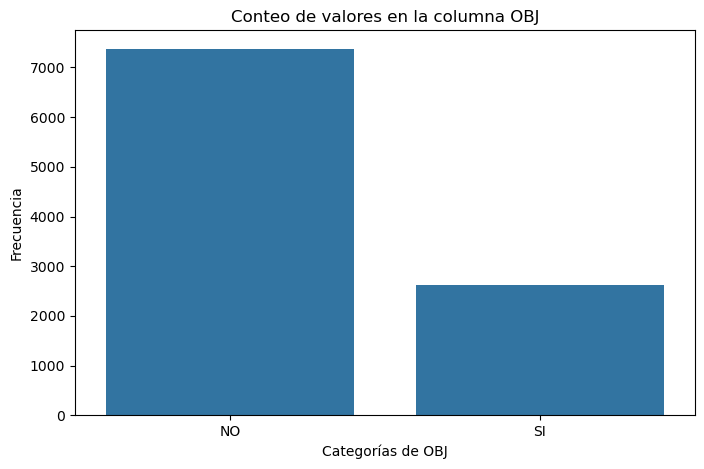

In [97]:
plt.figure(figsize=(8, 5))
sns.countplot(x=group_1_df["OBJ"])

# Etiquetas y título
plt.xlabel("Categorías de OBJ")
plt.ylabel("Frecuencia")
plt.title("Conteo de valores en la columna OBJ")
plt.show()


## EDA - Multivariable

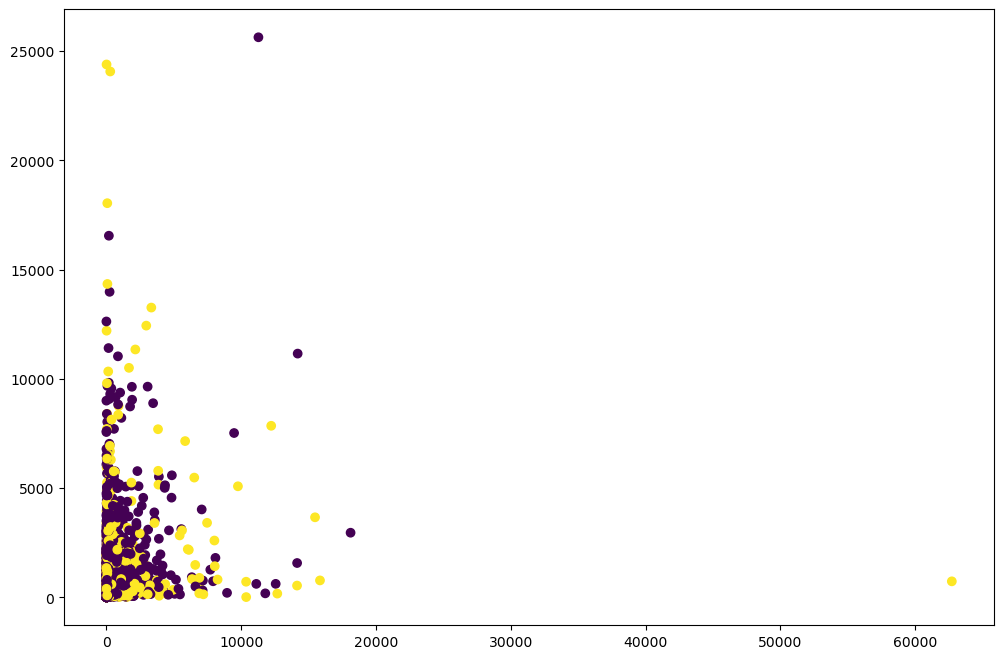

In [98]:
plt.figure(figsize=(12, 8))
y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})
plt.scatter(df_numeric["V4"], df_numeric["V18"], c=y_df)
plt.show()

### Correlación de Variables

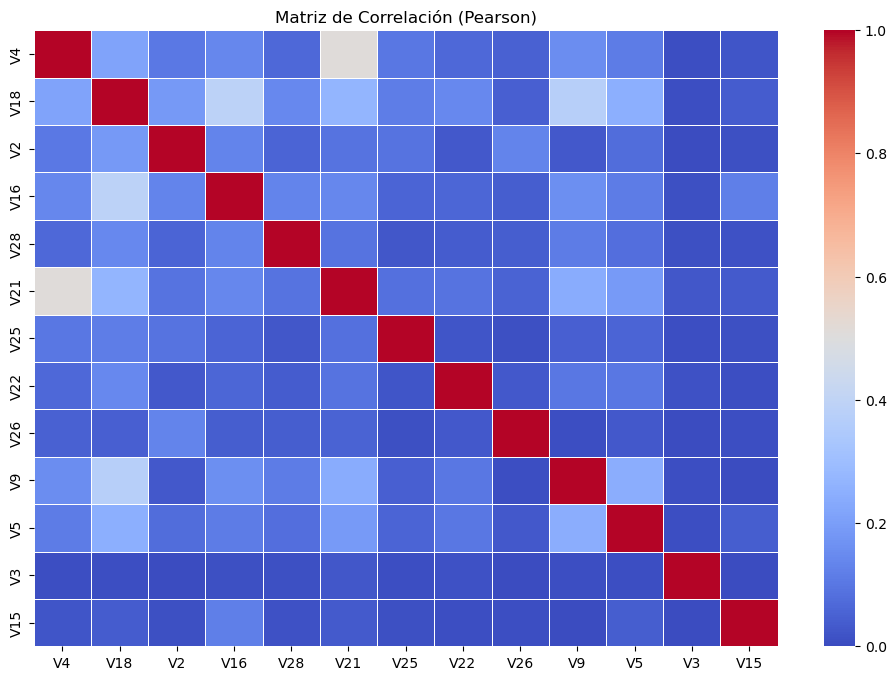

In [99]:
correlation_matrix = df_numeric.corr(method="pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Etiquetas y título
plt.title("Matriz de Correlación (Pearson)")

# Mostrar gráfico
plt.show()

## Resumen - EDA
- Vemos que las variables V1 hasta V30 tienen un sesgo a la derecha
- Tienen una dispersión alta y muchos outliers en casi todas las variables numericas
- La distribución y las dimensiones son diferentes, habría que ver la necesidad de normalizar.
- La variable objetivo "OBJ" no está balanceada entonces podemos caer en un sesgo para los valores "NO" a diferencia de "SI"

## Normalizacion

In [100]:
from sklearn.preprocessing import StandardScaler
z_core_scaler = StandardScaler()
X_df = pd.DataFrame(z_core_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
X_df.head()

y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})

## Separacion de Set de Datos

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

## Entrenamiento de Modelos

### Train and Evaluate All Models

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

scores = ('precision', 'recall', 'f1', 'accuracy')
score_response = []
confution_matrix_responses = {}
scorers = {
    "precision": make_scorer(precision_score, average="binary", zero_division=1),
    "recall": make_scorer(recall_score, average="binary", zero_division=1),
    "f1": make_scorer(f1_score, average="binary", zero_division=1),
    "accuracy": make_scorer(accuracy_score)
}

models_to_apply = {
    'knn': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            "knn__weights": ["uniform", "distance"],
            "knn__n_neighbors": [3, 5, 7, 9, 11],
            "knn__metric": ["euclidean", "manhattan", "minkowski"],
            "knn__p": [1,2],
        }
    },
    'svc': {
        'model': SVC(),
        'param_grid': {
            'svc__C': [0.1, 1, 10, 100],
            'svc__kernel': ["poly", "rbf"],
            "svc__degree": [2, 3, 4],
            "svc__class_weight": ["balanced"],
        }
    },
    'xgb': {
        'model': xgb.XGBClassifier(eval_metric="logloss"),
        'param_grid': {
            "xgb__n_estimators": [30, 50, 100],  # Número de árboles
            "xgb__max_depth": [3, 5, 7],  # Profundidad de los árboles
            "xgb__learning_rate": [0.01, 0.1, 0.2],  # Tasa de aprendizaje
            "xgb__subsample": [0.7, 0.8, 1.0],  # Fracción de datos usados en cada iteración
            "xgb__gamma": [ 0.1, 0.2],  # Regularización para evitar sobreajuste
            "xgb__scale_pos_weight": [len(y_train[y_train==0]) / len(y_train[y_train==1])],
        }
    },
    'tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            "tree__criterion": ["entropy"],  # Función de impureza
            "tree__max_depth": [3, 5, 10],  # Profundidad máxima del árbol
            "tree__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
            "tree__min_samples_leaf": [1, 2, 5],  # Mínimo de muestras en una hoja
            "tree__ccp_alpha": [0.0, 0.01, 0.1],
            "tree__class_weight": [{0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 7}]
        }
    },
    'log_reg': {
        'model': LogisticRegression(),
        'param_grid': {
            "log_reg__max_iter": [1000],
            "log_reg__solver": ["liblinear"],
            "log_reg__class_weight": ["balanced"],
            'log_reg__C': [1, 5, 10, 15, 20],  # Valores de la regularización
            'log_reg__penalty': ['l1', 'l2']   # Tipos de penalización
        }
    }
}


for model_name, model_definition in models_to_apply.items():
    print('#'*5)
    print('Training and evaluating model', model_name)
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Estandariza los datos (importante para KNN)
        (model_name, model_definition["model"])
    ])
    execution_time = time.time()
    param_grid = model_definition["param_grid"]
    for i, eval_metric in enumerate(scores):
        print('working with score', eval_metric)
        grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=scorers[eval_metric], cv=5, n_jobs=-1)
        grid_clas_p.fit(X_train, y_train)
        
        best_model = grid_clas_p.best_estimator_
        
        best_cv_score = grid_clas_p.best_score_

        # Evaluar el modelo en el conjunto de test
        y_test_pred = best_model.predict(X_test)
        test_score = scorers[eval_metric]._score_func(y_test, y_test_pred)

        cm = confusion_matrix(y_test, y_test_pred)
        confution_matrix_responses[model_name] = cm

        score_response.append({
            'model': model_name,
            'score_metric_name': eval_metric,
            'cv_score': best_cv_score,  # Mejor score en validación cruzada
            'test_score': test_score  # Score real en conjunto de prueba
        })
    execution_time = time.time() - execution_time
    print('Execution time', f"{execution_time:.2f}")

#####
Training and evaluating model knn
working with score precision


### Confusion Matrix

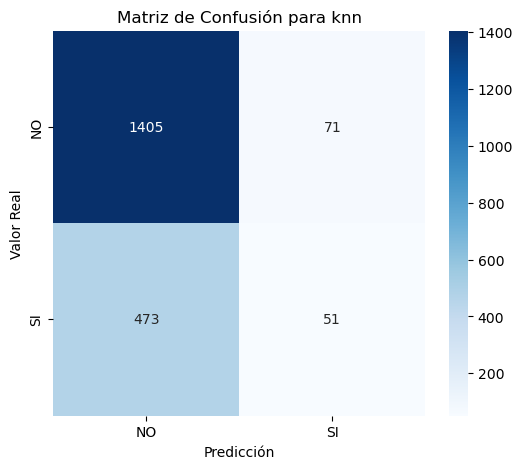

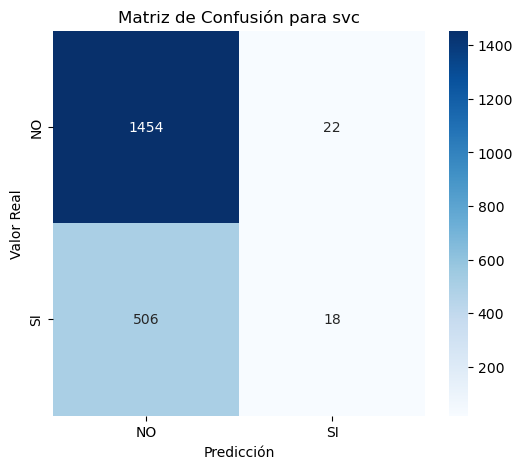

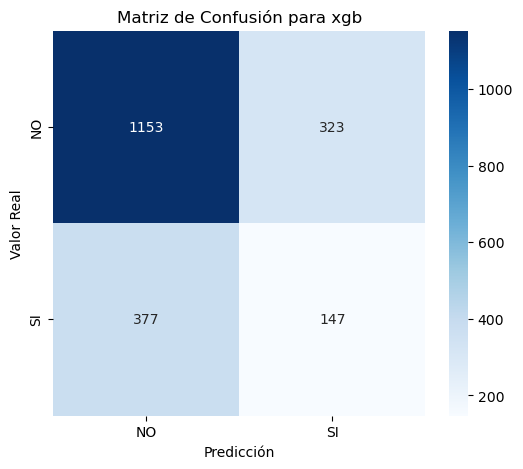

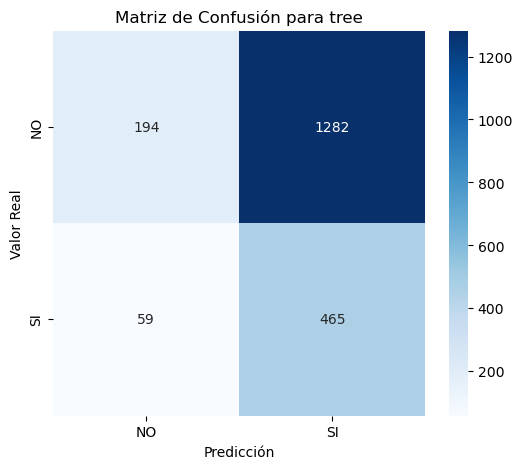

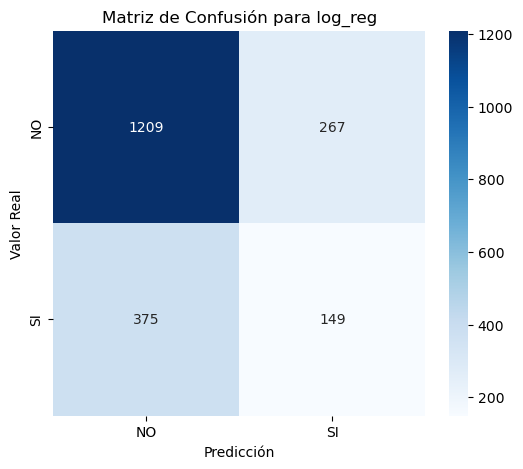

In [131]:
# Visualizar la matriz de confusión
for model, current_matrix in confution_matrix_responses.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(current_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["NO", "SI"], yticklabels=["NO", "SI"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusión para {model}")
    plt.show()

### Best Scores

In [132]:
df_best_score_responses = pd.DataFrame(score_response)
df_best_score_responses

,model,score_metric_name,cv_score,test_score
0,knn,precision,0.358867,0.418033
1,knn,recall,0.201432,0.206107
2,knn,f1,0.236658,0.236066
3,knn,accuracy,0.721750,0.728000
4,svc,precision,0.400704,0.450000
5,svc,recall,0.315990,0.332061
6,svc,f1,0.335677,0.355828
7,svc,accuracy,0.733375,0.736000
8,xgb,precision,0.347092,0.327485
9,xgb,recall,0.558473,0.624046


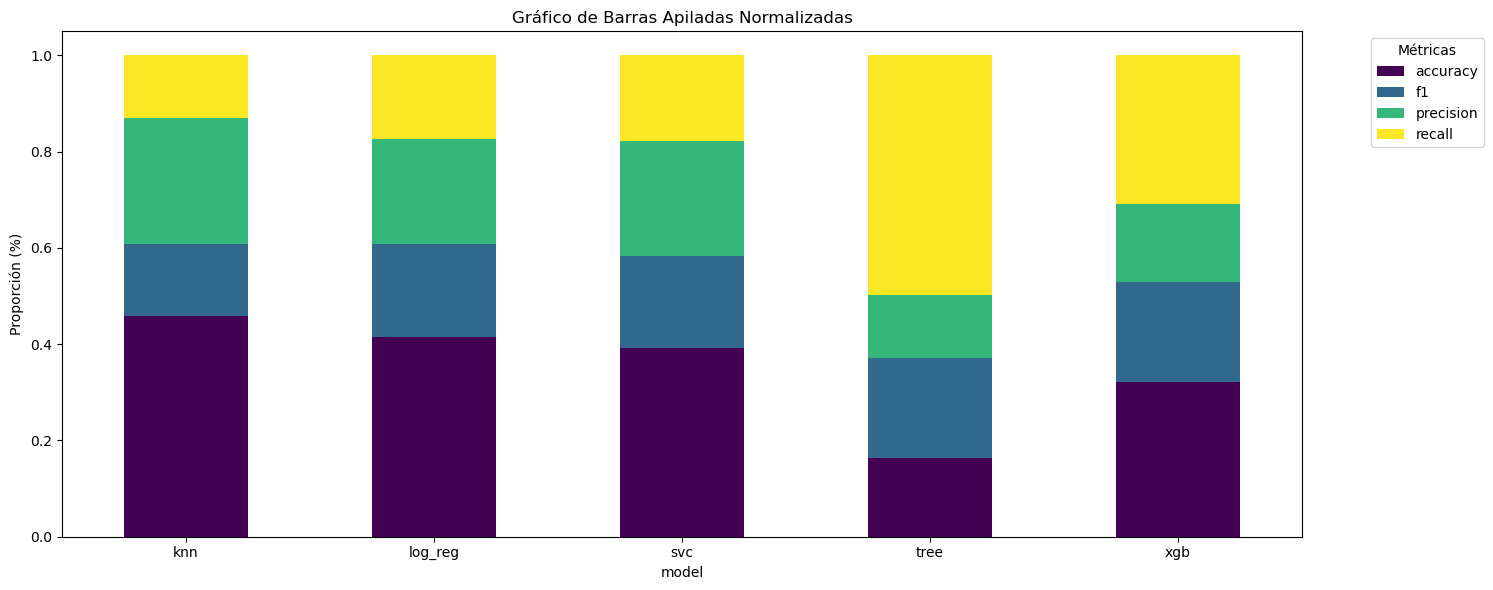

In [133]:


df_pivot = pd.crosstab(df_best_score_responses["model"], df_best_score_responses["score_metric_name"], values=df_best_score_responses["test_score"], aggfunc="sum", normalize="index")
df_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))


plt.ylabel("Proporción (%)")
plt.title("Gráfico de Barras Apiladas Normalizadas")
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Comprobación - Analizando Falsos Negativos

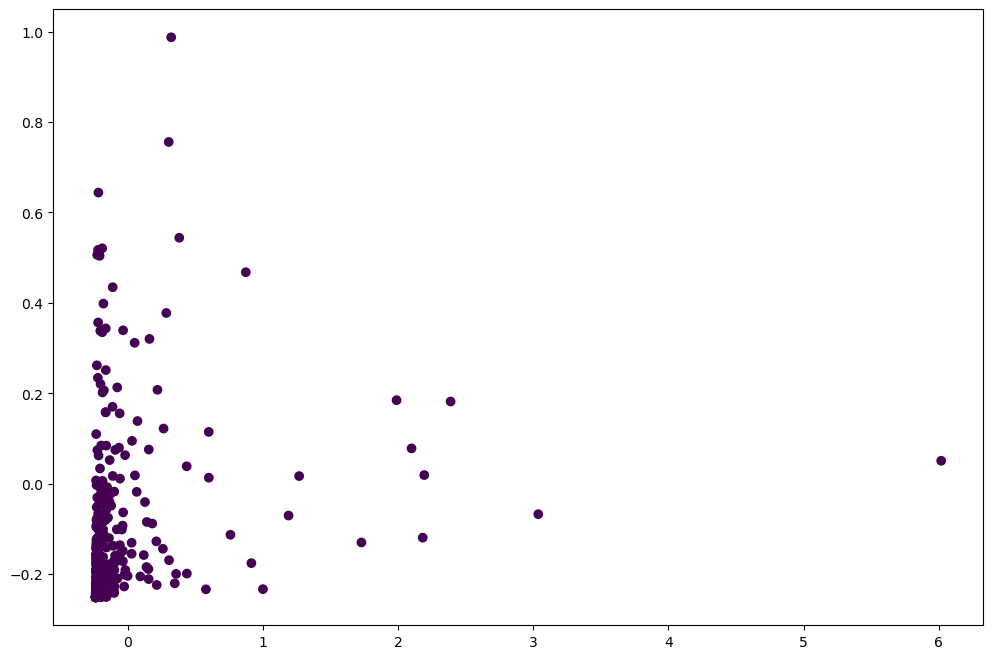

In [64]:
# Errores
errores_X_df = X_test[(y_test == 1) & (y_pred == 0)]
errores_y_df = y_test[(y_test == 1) & (y_pred == 0)]

plt.figure(figsize=(12, 8))
plt.scatter(errores_X_df["V5"], errores_X_df["V16"], c=errores_y_df)
plt.show()

OBJ
1    51
Name: count, dtype: int64


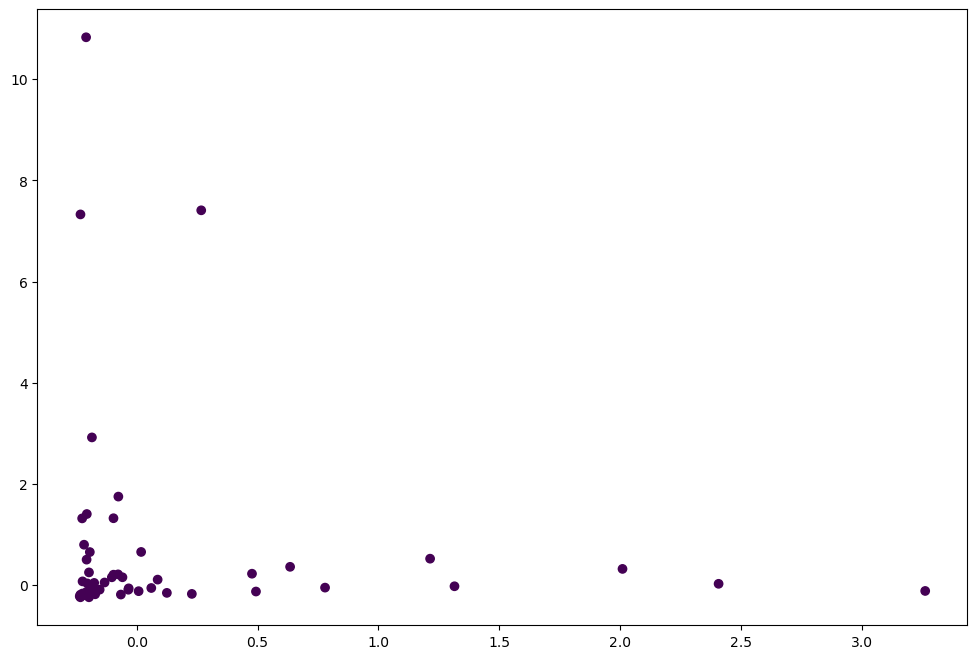

In [67]:
# Aciertos
aciertos_X_df = X_test[(y_test == 1) & (y_pred == 1)]
aciertos_y_df = y_test[(y_test == 1) & (y_pred == 1)]
print(aciertos_y_df.value_counts())

plt.figure(figsize=(12, 8))
plt.scatter(aciertos_X_df["V5"], aciertos_X_df["V16"], c=aciertos_y_df)
plt.show()